In [1]:
import kaggle
import pandas as pd
import tensorflow as tf

# Specify the dataset path on Kaggle (you can find it on the Kaggle dataset page)
dataset_path = 'blastchar/telco-customer-churn'

# Download the dataset
kaggle.api.dataset_download_files(dataset_path,path="DATASETS/", unzip=True,quiet=False)

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|████████████████████████████████████████████████████████████████████████████████| 172k/172k [00:00<00:00, 201kB/s]

In [2]:
df = pd.read_csv("DATASETs/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df_copy = df.copy()

In [5]:
df.drop('customerID', inplace = True, axis = "columns")

In [6]:
def uni_val(df):
    for column in df:
        print(f'{column}: {df[column].unique()}')
uni_val(df)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [7]:
df.replace('No internet service','No', inplace  =True)
df['Contract'].replace('Month-to-month',1,inplace=True)
df['Contract'].replace('One year',12,inplace=True)
df['Contract'].replace('Two year',24,inplace=True)
df['MultipleLines'].replace('No phone service','No',inplace=True)

In [8]:
df['gender'] = df['gender'].map({'Female' : 0,'Male' : 1})
df['Partner'] =  df['Partner'].map({'No' : 0,'Yes' : 1})
df['PhoneService'] =  df['PhoneService'].map({'No' : 0,'Yes' : 1})
df['PaperlessBilling'] =  df['PaperlessBilling'].map({'No' : 0,'Yes' : 1})
df['Dependents'] =  df['Dependents'].map({'No' : 0,'Yes' : 1})
df['MultipleLines'] =  df['MultipleLines'].map({'No' : 0,'Yes' : 1})
df['OnlineSecurity'] =  df['OnlineSecurity'].map({'No' : 0,'Yes' : 1})
df['Churn'] =  df['Churn'].map({'No' : 0,'Yes' : 1})
df['OnlineBackup'] =  df['OnlineBackup'].map({'No' : 0,'Yes' : 1})
df['DeviceProtection'] =  df['DeviceProtection'].map({'No' : 0,'Yes' : 1})
df['TechSupport'] =  df['TechSupport'].map({'No' : 0,'Yes' : 1})
df['StreamingTV'] =  df['StreamingTV'].map({'No' : 0,'Yes' : 1})
df['StreamingMovies'] =  df['StreamingMovies'].map({'No' : 0,'Yes' : 1})


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['tenure'] = label_encoder.fit_transform(df['tenure'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [9]:
# Step 1: Create the dummy variables
df2 = pd.get_dummies(df, columns=['PaymentMethod', 'InternetService'])

# Step 2: Convert the dummy columns to integers
dummy_columns = df2.columns[df2.columns.str.startswith(('PaymentMethod_', 'InternetService_'))]
df2[dummy_columns] = df2[dummy_columns].astype(int)


In [10]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'].str.strip())
df2.fillna(0, inplace=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2['MonthlyCharges'] = scaler.fit_transform(df2[['MonthlyCharges']])
df2['TotalCharges'] = scaler.fit_transform(df2[['TotalCharges']])
df2['tenure'] = scaler.fit_transform(df2[['tenure']])
df2['Contract'] = scaler.fit_transform(df2[['Contract']])

In [12]:
uni_val(df2)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

In [13]:
from sklearn.model_selection import train_test_split

x = df2.drop('Churn', axis=1)  
y = df2['Churn']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape

(5634, 24)

In [14]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [15]:
y_train.value_counts()

Churn
0    4117
1    1517
Name: count, dtype: int64

In [16]:
y_test.value_counts()

Churn
0    1057
1     352
Name: count, dtype: int64

In [17]:
def get_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_shape = (24,) , activation = "leaky_relu"),  #how many value at once will be supplied  (here there are 24 columns so each row has 24 values)
    tf.keras.layers.Dense(24, activation = "leaky_relu"),
    tf.keras.layers.Dense(16, activation = "leaky_relu"),
    tf.keras.layers.Dense(16, activation = "leaky_relu"),
    tf.keras.layers.Dense(16, activation = "leaky_relu"),
    tf.keras.layers.Dense(16, activation = "leaky_relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])
    return model


In [ ]:
with tf.device('/GPU:0'):
    gpu_model = get_model()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
    gpu_model.fit( x_train, y_train, epochs = 1000, callbacks=[early_stopping])

Epoch 1/1000


In [20]:
gpu_model.evaluate(x_test, y_test)
0.7364

45/45 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7686


0.7364

In [22]:
y_predict = gpu_model.predict(x_test)

45/45 [==============================] - 0s 3ms/step


In [26]:
y_predict[:5]

array([[0.00544946],
       [0.8413452 ],
       [0.06204079],
       [0.11641217],
       [0.0198795 ]], dtype=float32)

In [33]:
import numpy as np
y_predict = np.round(y_predict)

In [34]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_predict)
print(cm)

[[912 112]
 [214 171]]


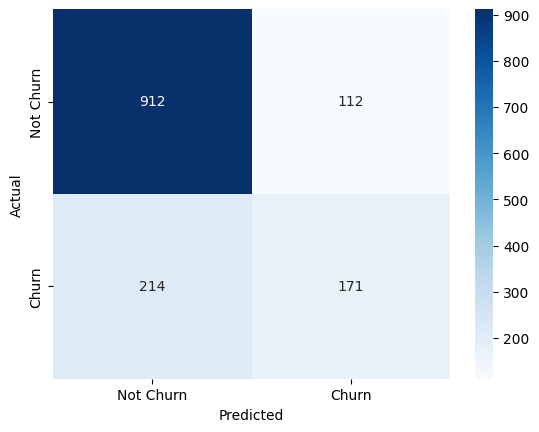

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.70      0.75       374
           1       0.73      0.82      0.77       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748

